# Medical Costs Analysis Using Linear Regression

# Linear Regration:
linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables

# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the data

In [2]:
d=pd.read_csv(r'C:\Users\Anand Mishra\Downloads\insurance.csv')
d

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# describe()
This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [3]:
d.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# print all statistical information

In [4]:
d.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# info()
print the information of the dataset

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# To check size of the data set

In [6]:
d.size

9366

# To check shape of data set

In [7]:
d.shape

(1338, 7)

# To check dimention of data set

In [8]:
d.ndim

2

# head()
To print top 5 rows

In [9]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# tail()
To print bottom 5 rows

In [10]:
d.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# To check is ther any missing value

In [11]:
d.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


# index
To print the index

In [12]:
d.index

RangeIndex(start=0, stop=1338, step=1)

# Sum of null value

In [13]:
d.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# To check the duplicated value

In [14]:
d.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

# Count the region

In [15]:
d['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# To view the record of male

In [16]:
dd=d[d['sex']=='male']
dd

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1327,51,male,30.030,1,no,southeast,9377.90470
1329,52,male,38.600,2,no,southwest,10325.20600


# To view the record of female

In [17]:
dd=d[d['sex']=='female']
dd

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


# Visualization of data set

# Plot a graph of insurance dataset

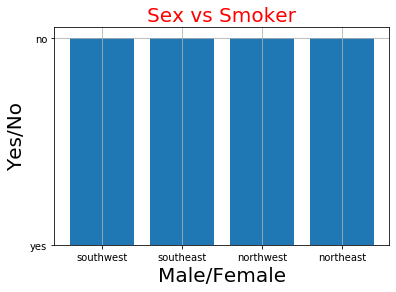

In [18]:
plt.bar(dd['region'],dd['smoker'])
plt.title('Sex vs Smoker',fontsize=20,color='red')
plt.xlabel('Male/Female',fontsize=20)
plt.ylabel('Yes/No',fontsize=20)
plt.grid(True)
plt.show()

# Scatter plot:
Plot a graph. which shows the relation between age and children 

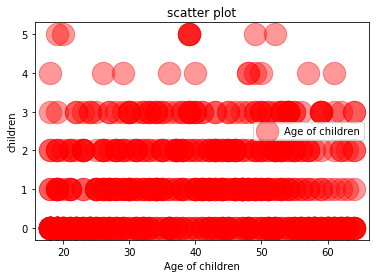

In [19]:
plt.scatter(x='age',y='children',label='Age of children',color='r',s=500,alpha=0.4,data=dd)
plt.xlabel('Age of children')
plt.ylabel('children')
plt.title('scatter plot')
plt.legend()
plt.show()

# pairpolt()
A pairplot plot a pairwise relationships in a dataset. The pairplot function
creates a grid of Axes such that each variable in data will by shared in
the y-axis across a single row and in the x-axis across a single column.

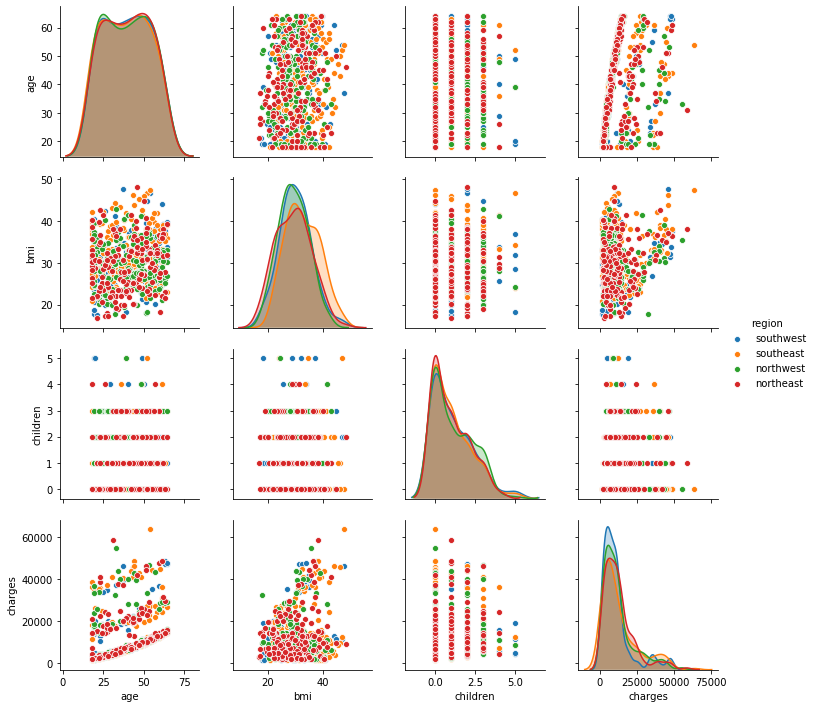

In [20]:
sns.pairplot(dd,diag_kind='kde',hue='region')
plt.show()

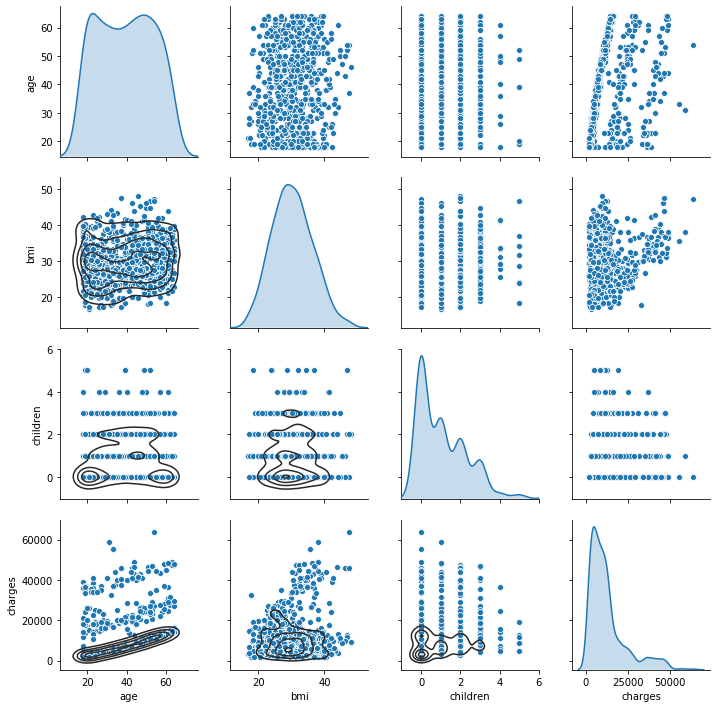

In [21]:
g = sns.pairplot(dd, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

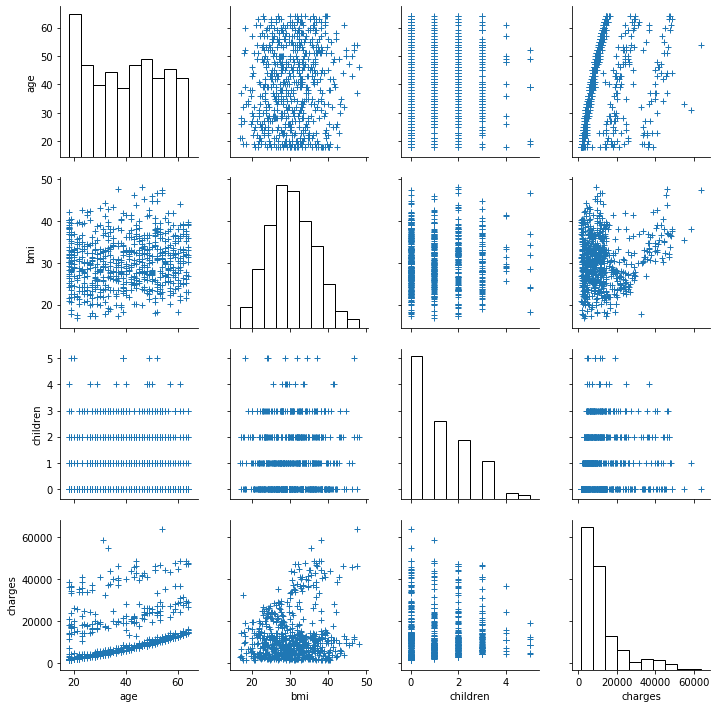

In [22]:
sns.pairplot(
    dd,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

# violinplot()
It shows the distribution of quantitative data across several levels of one (or more) categorical
variables such that those distributions can be compared.

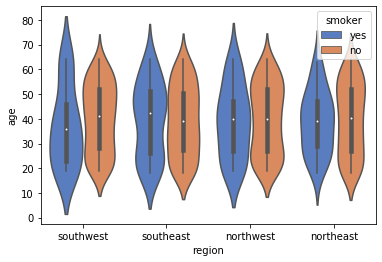

In [23]:
ax = sns.violinplot(x="region", y="age", hue="smoker",
                    data=dd, palette="muted")

# swarmplot()
Swarm Plots, also called beeswarm plots, are similar to strip plots in that they plot all of the data points.
Unlike strip plots, swarm plots attempt to avoid obscuring points by calculating non-overlapping
positions instead of adding random jitter.2

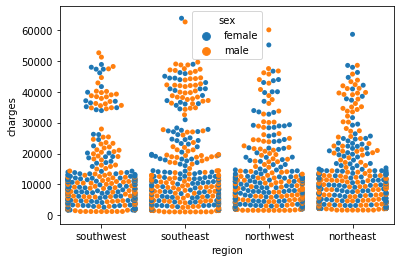

In [24]:
sns.swarmplot(data=d,x='region',y='charges',hue='sex')
plt.show()

# To plot box plot

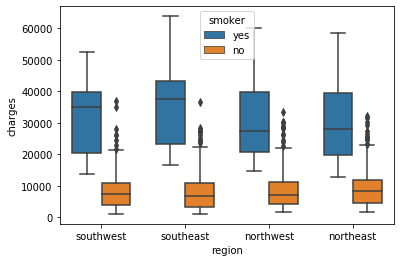

In [25]:
sns.boxplot(x='region',y='charges',hue='smoker',width=0.7,data=d)
plt.show()

# corr()
Is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded.
For any non-numeric data type columns in the dataframe it is ignored.

In [26]:
d.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# heatmap()
A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

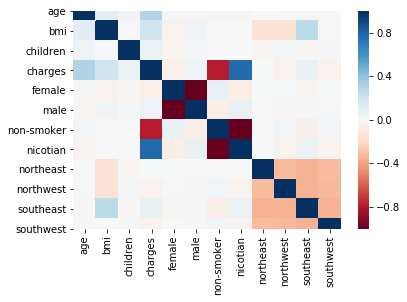

In [49]:
sns.heatmap(d.corr(),cmap='RdBu',vmin=-1,vmax=1)
plt.show()

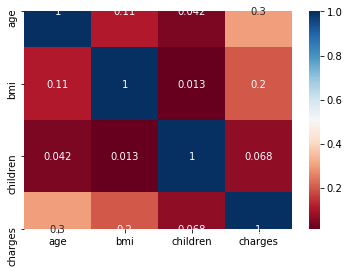

In [28]:
sns.heatmap(d.corr(),cmap='RdBu',annot=True)
plt.show()

# bins = 10 plots in equal distribution


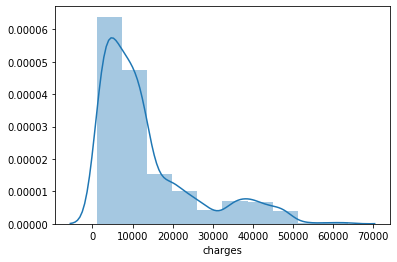

In [30]:
sns.distplot(d.charges,bins=10)
plt.show()

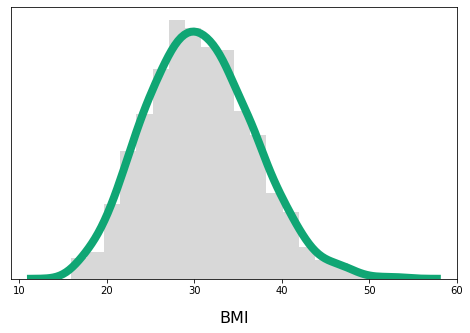

In [31]:
plt.figure(figsize=(8,5))
sns.distplot(d.bmi,
             bins=20,
             kde_kws={"lw":8,'color':'xkcd:bluish green'},
             hist_kws={'alpha':0.3,'color':'gray'}
)
plt.xlabel('BMI',fontsize=16,labelpad=15)
plt.yticks([])
plt.show()

# regplot():
This method is used to plot data and a linear regression model fit. ... If strings

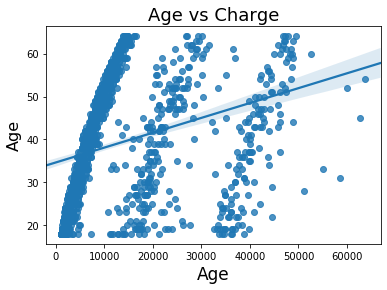

In [32]:
sns.regplot(y=d['age'],x=d['charges'])
plt.title('Age vs Charge',size=18)
plt.ylabel('Age',size=16)
plt.xlabel('Age',size=17)
plt.show()

# import norm from scipy.stats

# import StandardScaler from sklearn.preprocessing

In [34]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# distplot()
The variable of interest is "charges". We want to predict what would be medical costs for specific individual,
based on other given information. Let's see distribution of data for "charges".

From the figure bellow we can conclude that the variable "charges" do not possess normal distribution of data,
but it has mixture distribution. That could be a problem for further assumptions.

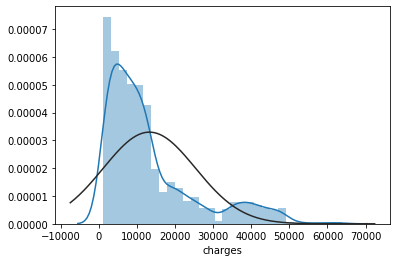

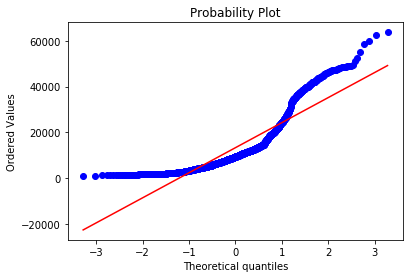

In [35]:
sns.distplot(d["charges"],fit=norm)
fig = plt.figure()
res = stats.probplot(d["charges"], plot=plt)

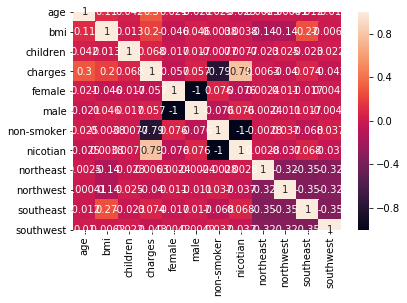

In [54]:
sns.heatmap(d.corr(),annot=True)

# To check column name

In [36]:
d.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# rename()
We have three non numerical categories: sex, smoker and region. We want to use them too. So the next step is to
convert these variables to binary values by using "One hot encoding" method.

In [37]:
sex_dummy = pd.get_dummies(d['sex'])
smoker_dummy = pd.get_dummies(d['smoker'])
region_dummy = pd.get_dummies(d['region'])

d = pd.concat([d,sex_dummy,smoker_dummy,region_dummy], axis=1)

d.rename(columns={'no': 'non-smoker', 'yes': 'nicotian'}, inplace=True)

# We can see last 8 columns at dataframe below (which represent converted categories)

In [62]:
d.head(10)

,age,sex,bmi,children,smoker,region,charges,female,male,non-smoker,...,southeast,southwest,female,male,non-smoker,nicotian,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,...,0,1,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,...,1,0,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,...,1,0,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,...,0,0,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,...,0,0,0,1,1,0,0,1,0,0
5,31,female,25.740,0,no,southeast,3756.62160,1,0,1,...,1,0,1,0,1,0,0,0,1,0
6,46,female,33.440,1,no,southeast,8240.58960,1,0,1,...,1,0,1,0,1,0,0,0,1,0
7,37,female,27.740,3,no,northwest,7281.50560,1,0,1,...,0,0,1,0,1,0,0,1,0,0
8,37,male,29.830,2,no,northeast,6406.41070,0,1,1,...,0,0,0,1,1,0,1,0,0,0
9,60,female,25.840,0,no,northwest,28923.13692,1,0,1,...,0,0,1,0,1,0,0,1,0,0


# drop()
To delete selected rows

In [38]:
d = d.drop(['sex','smoker','region'], axis=1)

# We have prepared our data for further processing. Finally, we can import, initialize and use the Linear Regression model.

In [39]:
d.head(10)

,age,bmi,children,charges,female,male,non-smoker,nicotian,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


In [40]:
from sklearn.model_selection import train_test_split

# Eleven dataframe categories will be used as inputs X for the model. And we want to fit our model according to "charges" category - output Y of the model

In [41]:
X = d[['age', 'female','male','non-smoker','nicotian','northeast','northwest','southeast','southwest','bmi', 'children']]
y = d['charges']

# We will use train_test_split function to divide our data to training and testing data.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(802, 11)
(536, 11)
(802,)
(536,)


In [63]:
print(np.mean(X_train))
print(np.mean(X_test))
print(np.mean(y_train))
print(np.mean(y_test))

age           39.430175
female         0.478803
male           0.521197
non-smoker     0.801746
nicotian       0.198254
northeast      0.243142
northwest      0.253117
southeast      0.265586
southwest      0.238155
bmi           30.572151
children       1.129676
dtype: float64
age           38.873134
female         0.518657
male           0.481343
non-smoker     0.785448
nicotian       0.214552
northeast      0.240672
northwest      0.227612
southeast      0.281716
southwest      0.250000
bmi           30.799925
children       1.042910
dtype: float64
13126.857807518705
13485.233263300363


# Procedure for importing and fitting the model.

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# We will create a new dataframe to present estimated coeffcieints of our model. First one is the intercept, and other coefficients are in correlation with specific categories.



In [44]:
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

-293.7460154216242
             Coefficient
age           243.533353
female        -87.429238
male           87.429238
non-smoker -11999.973124
nicotian    11999.973124
northeast     445.648198
northwest     350.264132
southeast    -521.551674
southwest    -274.360656
bmi           336.968721
children      673.820362


# Final part is to use fitted model for predicting new values (based on prepared X_test array)

In [45]:
predictions = lm.predict(X_test)
print("Predicted medical costs values:", predictions)

Predicted medical costs values: [ 5513.00189848 27670.14341082 38885.0719728  30468.90964232
  2166.47224579  2728.95854267  1943.04528313  2044.86969931
  8637.65226843 11410.57627765 11888.27978298 13696.57646576
 11288.38866417  9654.29004717  7266.64849971 12083.99723272
  5848.68948665 13018.864278    9961.03718989 24394.56778051
 11581.08045672  6716.97873298 10247.37797573  6081.96707085
  9580.07862572  5668.69817738  5353.51101931 16502.90816923
  8007.14402134  9633.06195022 12341.51464651 25106.09244355
 11158.87119012 16247.21849742 12614.07690612  6002.94910148
  6573.84710034   183.10020814 11242.28595197  8981.27743195
 12491.05349926 12905.15113901 34637.74323436 13395.05956506
   637.50286583 33437.67194049 14804.19941229  7893.4675565
  9113.95922086  7426.70864218  3642.62579018  9791.12407567
 28631.04461934 14625.24207227  8768.53645814 16696.59986447
  6311.96424229  1945.32953919   821.77268874  8000.41867329
 15378.34419046 11702.54341083  9458.5461902   8339.05

# Graphical comparison of expected values (y_test) and predicted values (predictions)

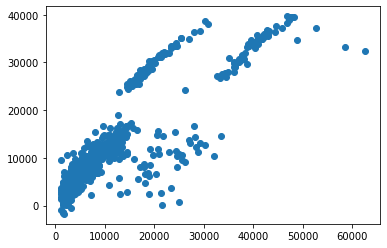

In [56]:
plt.scatter(y_test, predictions)

# Also, let's see error distribution graph of our predictions. Very close to normally distributed data.

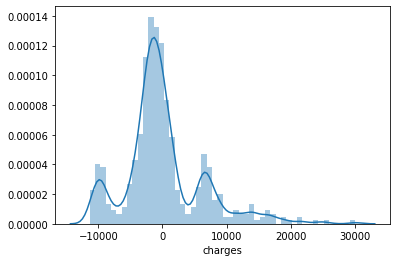

In [57]:
sns.distplot((y_test-predictions), bins=50)

# Finally, let's print MAE and MSE erorrs for entire test data.

In [58]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))

4344.908424140114
38753945.045067705


# CONCLUSION

DATA SET: insurance 

Medical Costs analysis using Simple Linear Regression. It shows the cleare picture of whole data set of insurance so that anyone can understand the output. with the help of sex row we can see the gender(male/female) who smoke age define the catogary of age people who smoke.

Graph represent data set in nice look which is understandable for anyone. with several graph we can plot the rows and colunms.
with the help of linear regression we can predict the relation between two variable in dataset and it is allows you to estimate how a dependent variable changes as the independent variable(s) change. Simple linear regression is used to estimate the relationship between two quantitative variables.